In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import math
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
df = pd.read_csv('../data/TG_STAID002759.txt', sep=',', comment='%', skiprows=18, skipfooter=10)

C:\Users\Affetheking\anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [3]:
df

,SOUID,DATE,TG,Q_TG
0,127488,18760101,22,0
1,127488,18760102,25,0
2,127488,18760103,3,0
3,127488,18760104,-58,0
4,127488,18760105,-98,0
...,...,...,...,...
52854,111448,20200916,221,0
52855,111448,20200917,146,0
52856,111448,20200918,130,0
52857,111448,20200919,144,0


In [4]:
df.columns = ["SOUID", "DATE", "TG", "Q_TG"]

In [5]:
df.isin([-9999]).sum()

SOUID      0
DATE       0
TG       195
Q_TG       0
dtype: int64

In [6]:
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m%d')
df['month'] = df['DATE'].dt.month
df['year'] = df['DATE'].dt.year
df['day'] = df['DATE'].dt.day

In [7]:
df.loc[df['TG'] == -9999]

,SOUID,DATE,TG,Q_TG,month,year,day
25316,127488,1945-04-25,-9999,9,4,1945,25
25317,127488,1945-04-26,-9999,9,4,1945,26
25318,127488,1945-04-27,-9999,9,4,1945,27
25319,127488,1945-04-28,-9999,9,4,1945,28
25320,127488,1945-04-29,-9999,9,4,1945,29
...,...,...,...,...,...,...,...
25506,127488,1945-11-01,-9999,9,11,1945,1
25507,127488,1945-11-02,-9999,9,11,1945,2
25508,127488,1945-11-03,-9999,9,11,1945,3
25509,127488,1945-11-04,-9999,9,11,1945,4


In [8]:
may_39_50 = ((df.loc[((1939 <= df['year']) & (df['year'] <= 1944)) & (df['month'] == 5)]['TG'].mean()) + \
(df.loc[((1946 <= df['year']) & (df['year'] <= 1950)) & (df['month'] == 5)]['TG'].mean())) / 2

In [9]:
june_39_50 = ((df.loc[((1939 <= df['year']) & (df['year'] <= 1944)) & (df['month'] == 6)]['TG'].mean()) + \
(df.loc[((1946 <= df['year']) & (df['year'] <= 1950)) & (df['month'] == 6)]['TG'].mean())) / 2

In [10]:
july_39_50 = ((df.loc[((1939 <= df['year']) & (df['year'] <= 1944)) & (df['month'] == 7)]['TG'].mean()) + \
(df.loc[((1946 <= df['year']) & (df['year'] <= 1950)) & (df['month'] == 7)]['TG'].mean())) / 2

In [11]:
august_39_50 = ((df.loc[((1939 <= df['year']) & (df['year'] <= 1944)) & (df['month'] == 8)]['TG'].mean()) + \
(df.loc[((1946 <= df['year']) & (df['year'] <= 1950)) & (df['month'] == 8)]['TG'].mean())) / 2

In [12]:
september_39_50 = ((df.loc[((1939 <= df['year']) & (df['year'] <= 1944)) & (df['month'] == 9)]['TG'].mean()) + \
(df.loc[((1946 <= df['year']) & (df['year'] <= 1950)) & (df['month'] == 9)]['TG'].mean())) / 2

In [13]:
october_39_50 = ((df.loc[((1939 <= df['year']) & (df['year'] <= 1944)) & (df['month'] == 10)]['TG'].mean()) + \
(df.loc[((1946 <= df['year']) & (df['year'] <= 1950)) & (df['month'] == 10)]['TG'].mean())) / 2

In [14]:
df.loc[(df['year'] == 1945) & (df['month'] == 5), 'TG'] = may_39_50

In [15]:
df.loc[(df['year'] == 1945) & (df['month'] == 6), 'TG'] = june_39_50

In [16]:
df.loc[(df['year'] == 1945) & (df['month'] == 7), 'TG'] = july_39_50

In [17]:
df.loc[(df['year'] == 1945) & (df['month'] == 8), 'TG'] = august_39_50

In [18]:
df.loc[(df['year'] == 1945) & (df['month'] == 9), 'TG'] = september_39_50

In [19]:
df.loc[(df['year'] == 1945) & (df['month'] == 10), 'TG'] = october_39_50

In [20]:
df = df.where(df!=-9999, np.nan)

In [21]:
df.loc[(df['year'] == 1945) & (df['month'] == 4)] = df.loc[(df['year'] == 1945) & (df['month'] == 4)]\
.fillna(method='ffill')

In [22]:
df.loc[(df['year'] == 1945) & (df['month'] == 11)] = df.loc[(df['year'] == 1945) & (df['month'] == 11)]\
.fillna(method='bfill')

In [23]:
df.isin([-9999]).sum(), df.isna().sum()

(SOUID    0
 DATE     0
 TG       0
 Q_TG     0
 month    0
 year     0
 day      0
 dtype: int64,
 SOUID    0
 DATE     0
 TG       0
 Q_TG     0
 month    0
 year     0
 day      0
 dtype: int64)

In [24]:
df.loc[(df['year'] == 1945)]

,SOUID,DATE,TG,Q_TG,month,year,day
25202,127488,1945-01-01,-28.0,0,1,1945,1
25203,127488,1945-01-02,-22.0,0,1,1945,2
25204,127488,1945-01-03,17.0,0,1,1945,3
25205,127488,1945-01-04,22.0,0,1,1945,4
25206,127488,1945-01-05,-18.0,0,1,1945,5
...,...,...,...,...,...,...,...
25562,127488,1945-12-27,44.0,0,12,1945,27
25563,127488,1945-12-28,61.0,0,12,1945,28
25564,127488,1945-12-29,32.0,0,12,1945,29
25565,127488,1945-12-30,2.0,0,12,1945,30


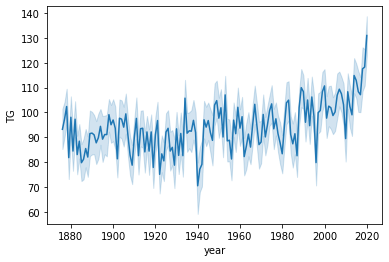

In [25]:
#%matplotlib notebook
sns.lineplot(data=df, x="year", y="TG")

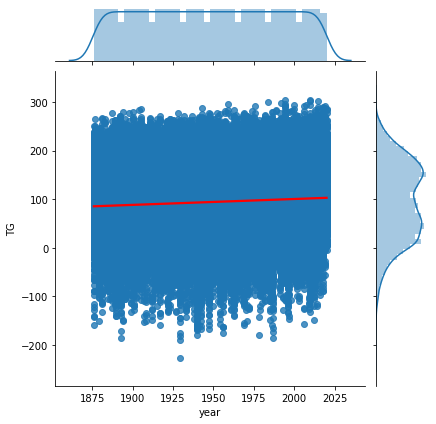

In [26]:
sns.jointplot(data=df, x="year", y="TG", kind='reg', joint_kws={'line_kws':{'color':'red'}})

## Decomposing to Components

We decompose the time series into its components to be able to model the different components separately \
before adding them for the final model together.

### a. diff function to find all changes

The diff function gives you the differences between consecutive elements (time steps). \
It is the opposite of the cumulative sum. 

In [27]:
df['diff'] = df['TG'].diff()
df.head()

,SOUID,DATE,TG,Q_TG,month,year,day,diff
0,127488,1876-01-01,22.0,0,1,1876,1,NaN
1,127488,1876-01-02,25.0,0,1,1876,2,3.0
2,127488,1876-01-03,3.0,0,1,1876,3,-22.0
3,127488,1876-01-04,-58.0,0,1,1876,4,-61.0
4,127488,1876-01-05,-98.0,0,1,1876,5,-40.0


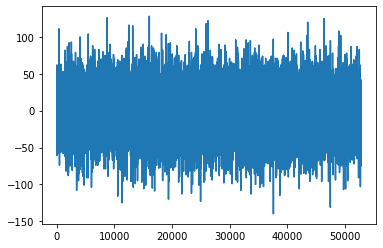

In [28]:
df['diff'].plot()

In [29]:
df['diff'].mean() # what does this mean? how do i read this?

0.0025918498618941314

## Im not sure if my data is heteroscedastic (meaning that the variance is changing, bad)

if it is, Percentage Change is a way to deal with that.

In [30]:
df['pct_change'] = df['TG'].pct_change()
df.head()

,SOUID,DATE,TG,Q_TG,month,year,day,diff,pct_change
0,127488,1876-01-01,22.0,0,1,1876,1,NaN,NaN
1,127488,1876-01-02,25.0,0,1,1876,2,3.0,0.136364
2,127488,1876-01-03,3.0,0,1,1876,3,-22.0,-0.880000
3,127488,1876-01-04,-58.0,0,1,1876,4,-61.0,-20.333333
4,127488,1876-01-05,-98.0,0,1,1876,5,-40.0,0.689655


In [31]:
f_index = list(df.loc[(df['pct_change'] == -np.inf) | (df['pct_change'].isna()) | (df['pct_change'] == np.inf)].index)

In [32]:
t_index = []
for i in f_index:
    x = i -1
    t_index.append(x)

In [33]:
df.loc[df.index.isin(t_index), ['TG']] = 1 # to solve the problem with large percentage values\
# you could also manually change the percentage change to a certain value or simply accept the \
# large percentage change

In [34]:
df['pct_change'] = df['TG'].pct_change()
df.head()

,SOUID,DATE,TG,Q_TG,month,year,day,diff,pct_change
0,127488,1876-01-01,22.0,0,1,1876,1,NaN,NaN
1,127488,1876-01-02,25.0,0,1,1876,2,3.0,0.136364
2,127488,1876-01-03,3.0,0,1,1876,3,-22.0,-0.880000
3,127488,1876-01-04,-58.0,0,1,1876,4,-61.0,-20.333333
4,127488,1876-01-05,-98.0,0,1,1876,5,-40.0,0.689655


In [35]:
df = df.drop(0, axis=0)

In [36]:
df.loc[df.index.isin(t_index)]

,SOUID,DATE,TG,Q_TG,month,year,day,diff,pct_change
37,127488,1876-02-07,1.0,0,2,1876,7,8.0,-1.125000
317,127488,1876-11-13,1.0,0,11,1876,13,39.0,-1.025641
727,127488,1877-12-28,1.0,0,12,1877,28,-5.0,-0.800000
1417,127488,1879-11-18,1.0,0,11,1879,18,-14.0,-0.928571
2208,127488,1882-01-17,1.0,0,1,1882,17,5.0,-1.200000
...,...,...,...,...,...,...,...,...,...
51521,111448,2017-01-22,1.0,0,1,2017,22,-19.0,-0.947368
51915,111448,2018-02-20,1.0,0,2,2018,20,-17.0,-0.941176
52213,111448,2018-12-15,1.0,0,12,2018,15,-4.0,-0.750000
52259,111448,2019-01-30,1.0,0,1,2019,30,-12.0,-0.916667


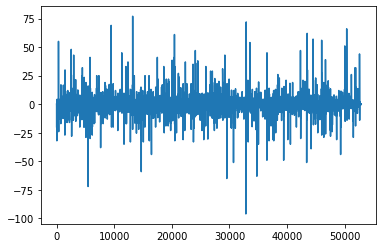

In [37]:
df['pct_change'].plot() # what does this mean, why is this good?

In [38]:
df['pct_change'].mean() #this should tell us the average change in temeprature per day

0.002220769380850906

#### Other option: Relative Change with logarithm

It also takes care of heteroscedasticity

In [39]:
#df['log'] = np.log(df['TG']) 
#df.head(100) # division by zero, i definitely need to talk about this, pass on log

In [40]:
# cant take log of negative, for perc_chang if temperature = 0 use 0.01 instead (or so)
# so i pass on log for the moment

In [41]:
#df['log'].plot()

In [42]:
#df['log'].isna().sum()

### b. Trend

The trend is the shift in your data over time. the above is also used to determine the trend.

## rolling mean

### Ill try to define a rolling mean using the month, later

In [43]:
#df.groupby(['month']).mean()

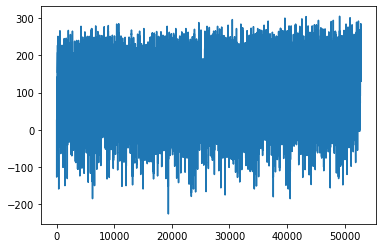

In [44]:
df['TG'].plot()

In [45]:
df['rolling'] = df['TG'].rolling(window=365).mean()

In [46]:
df

,SOUID,DATE,TG,Q_TG,month,year,day,diff,pct_change,rolling
1,127488,1876-01-02,25.0,0,1,1876,2,3.0,0.136364,NaN
2,127488,1876-01-03,3.0,0,1,1876,3,-22.0,-0.880000,NaN
3,127488,1876-01-04,-58.0,0,1,1876,4,-61.0,-20.333333,NaN
4,127488,1876-01-05,-98.0,0,1,1876,5,-40.0,0.689655,NaN
5,127488,1876-01-06,-77.0,0,1,1876,6,21.0,-0.214286,NaN
...,...,...,...,...,...,...,...,...,...,...
52854,111448,2020-09-16,221.0,0,9,2020,16,-11.0,-0.047414,117.610959
52855,111448,2020-09-17,146.0,0,9,2020,17,-75.0,-0.339367,117.690411
52856,111448,2020-09-18,130.0,0,9,2020,18,-16.0,-0.109589,117.736986
52857,111448,2020-09-19,144.0,0,9,2020,19,14.0,0.107692,117.794521


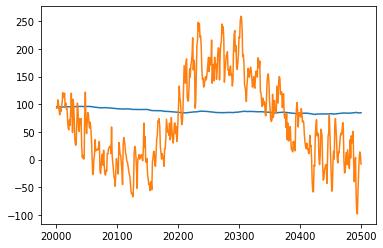

In [47]:
df['rolling'].iloc[20000:20500].plot()
df['TG'].iloc[20000:20500].plot()

In [48]:
df.iloc[20000:20500]

,SOUID,DATE,TG,Q_TG,month,year,day,diff,pct_change,rolling
20001,127488,1930-10-06,93.0,0,10,1930,6,-33.0,-0.261905,95.547945
20002,127488,1930-10-07,93.0,0,10,1930,7,0.0,0.000000,95.465753
20003,127488,1930-10-08,108.0,0,10,1930,8,15.0,0.161290,95.334247
20004,127488,1930-10-09,100.0,0,10,1930,9,-8.0,-0.074074,95.298630
20005,127488,1930-10-10,89.0,0,10,1930,10,-11.0,-0.110000,95.276712
...,...,...,...,...,...,...,...,...,...,...
20496,127488,1932-02-13,-23.0,0,2,1932,13,33.0,-0.589286,84.394521
20497,127488,1932-02-14,4.0,0,2,1932,14,27.0,-1.173913,84.460274
20498,127488,1932-02-15,14.0,0,2,1932,15,10.0,2.500000,84.641096
20499,127488,1932-02-16,8.0,0,2,1932,16,-6.0,-0.428571,84.660274


### c. Noise
noise is random abberations from an ideal "curve".

In [49]:
# noise is what will be left after we extract seasonality and trend.

### d. Seasonality

#Seasonality is about reoccuring patterns in your time series. Formally it is expected to be in time-spans less than a year.

#This could be a dependence on the seasons of a year, or on the hour of the day, or week and weekend day differences.

### How can we get the seasonality?

In [50]:
df['TG_wo_Trend'] = df['TG'] - df['rolling'] # this is correct

In [51]:
df.iloc[20250:20340]

,SOUID,DATE,TG,Q_TG,month,year,day,diff,pct_change,rolling,TG_wo_Trend
20251,127488,1931-06-13,159.0,0,6,1931,13,-26.0,-0.140541,86.561644,72.438356
20252,127488,1931-06-14,184.0,0,6,1931,14,25.0,0.157233,86.378082,97.621918
20253,127488,1931-06-15,171.0,0,6,1931,15,-13.0,-0.070652,86.320548,84.679452
20254,127488,1931-06-16,174.0,0,6,1931,16,3.0,0.017544,86.265753,87.734247
20255,127488,1931-06-17,216.0,0,6,1931,17,42.0,0.241379,86.279452,129.720548
...,...,...,...,...,...,...,...,...,...,...,...
20336,127488,1931-09-06,121.0,0,9,1931,6,-1.0,-0.008197,86.635616,34.364384
20337,127488,1931-09-07,105.0,0,9,1931,7,-16.0,-0.132231,86.542466,18.457534
20338,127488,1931-09-08,96.0,0,9,1931,8,-9.0,-0.085714,86.443836,9.556164
20339,127488,1931-09-09,111.0,0,9,1931,9,15.0,0.156250,86.383562,24.616438


In [52]:
df['seasonal'] = df['TG_wo_Trend'].rolling(window=30).mean() #this is actually the season

In [53]:
df['residual'] = df['TG'] - df['rolling'] - df['seasonal']

In [54]:
df.iloc[20000:20500]

,SOUID,DATE,TG,Q_TG,month,year,day,diff,pct_change,rolling,TG_wo_Trend,seasonal,residual
20001,127488,1930-10-06,93.0,0,10,1930,6,-33.0,-0.261905,95.547945,-2.547945,27.641279,-30.189224
20002,127488,1930-10-07,93.0,0,10,1930,7,0.0,0.000000,95.465753,-2.465753,26.160639,-28.626393
20003,127488,1930-10-08,108.0,0,10,1930,8,15.0,0.161290,95.334247,12.665753,25.416347,-12.750594
20004,127488,1930-10-09,100.0,0,10,1930,9,-8.0,-0.074074,95.298630,4.701370,24.366484,-19.665114
20005,127488,1930-10-10,89.0,0,10,1930,10,-11.0,-0.110000,95.276712,-6.276712,22.849680,-29.126393
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20496,127488,1932-02-13,-23.0,0,2,1932,13,33.0,-0.589286,84.394521,-107.394521,-83.064292,-24.330228
20497,127488,1932-02-14,4.0,0,2,1932,14,27.0,-1.173913,84.460274,-80.460274,-84.552968,4.092694
20498,127488,1932-02-15,14.0,0,2,1932,15,10.0,2.500000,84.641096,-70.641096,-85.613059,14.971963
20499,127488,1932-02-16,8.0,0,2,1932,16,-6.0,-0.428571,84.660274,-76.660274,-87.170959,10.510685


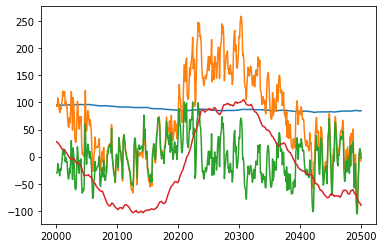

In [55]:
df['rolling'].iloc[20000:20500].plot()
df['TG'].iloc[20000:20500].plot()
df['residual'].iloc[20000:20500].plot()
df['seasonal'].iloc[20000:20500].plot()

In [56]:
#now lets check on the autocorrelation of the different columns

C:\Users\Affetheking\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


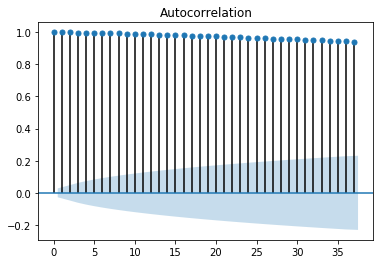

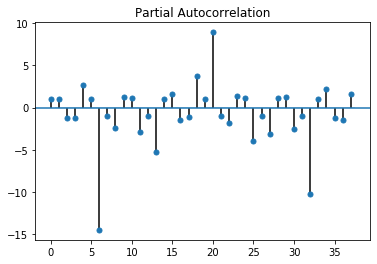

In [57]:
plot_acf(df['rolling'].iloc[-5000:]);
plot_pacf(df['rolling'].iloc[-5000:]); # autocorrelation of the trend is massive as was to be expected

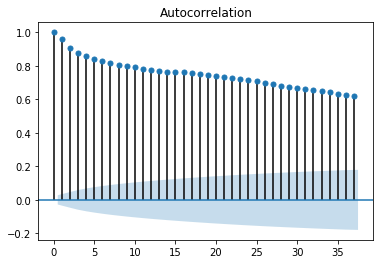

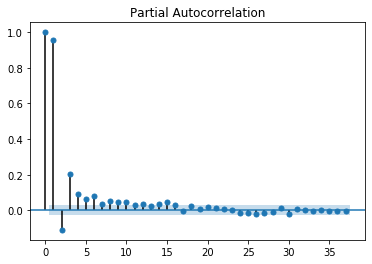

In [58]:
plot_acf(df['TG'].iloc[-5000:]);
plot_pacf(df['TG'].iloc[-5000:]);

C:\Users\Affetheking\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


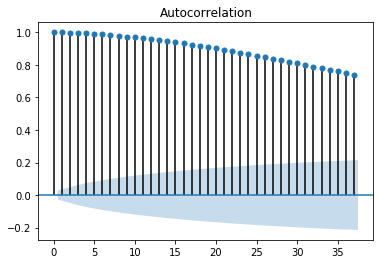

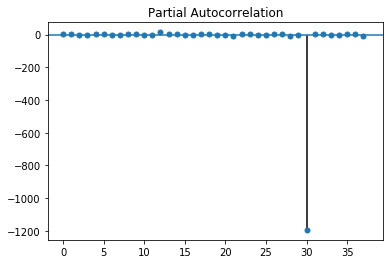

In [59]:
plot_acf(df['seasonal'].iloc[-5000:]);
plot_pacf(df['seasonal'].iloc[-5000:]);

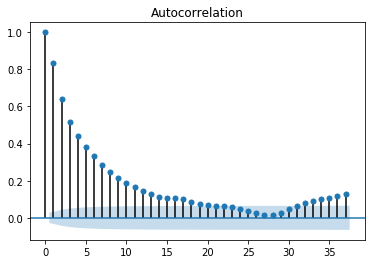

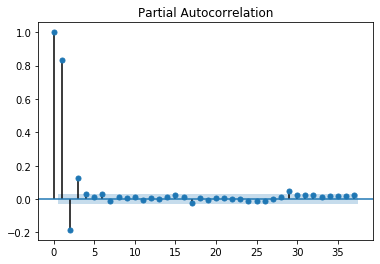

In [60]:
plot_acf(df['residual'].iloc[-5000:]);
plot_pacf(df['residual'].iloc[-5000:]); # the residual seems to still contain some information.

(array([  1.,   0.,   1.,   1.,   0.,   0.,   3.,   0.,   0.,   0.,   3.,
          2.,   0.,   0.,   1.,   1.,   0.,   3.,   1.,   0.,   2.,   3.,
          4.,   5.,  10.,   8.,  13.,  19.,  14.,  21.,  28.,  33.,  33.,
         40.,  39.,  56.,  62.,  68.,  84.,  90.,  97., 106., 125., 124.,
        125., 149., 158., 131., 164., 172., 153., 171., 171., 156., 148.,
        151., 154., 142., 152., 139., 133., 117., 118., 116.,  85., 112.,
         81.,  90.,  78.,  68.,  64.,  64.,  42.,  39.,  45.,  36.,  28.,
         17.,  18.,  13.,  14.,  12.,  17.,  14.,   9.,   4.,   5.,   5.,
          1.,   5.,   6.,   1.,   1.,   0.,   1.,   1.,   0.,   1.,   1.,
          1.]),
 array([-168.58401826, -165.42724658, -162.27047489, -159.1137032 ,
        -155.95693151, -152.80015982, -149.64338813, -146.48661644,
        -143.32984475, -140.17307306, -137.01630137, -133.85952968,
        -130.70275799, -127.5459863 , -124.38921461, -121.23244292,
        -118.07567123, -114.91889954, -111.762

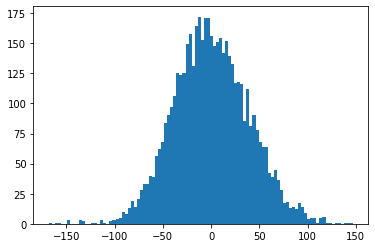

In [61]:
plt.hist(df['residual'].iloc[-5000:], bins = 100) #but the residual is normally distributed

## diff of the residual

In [65]:
df['res_diff'] = df['residual'].diff()
df.iloc[4000:4500]

,SOUID,DATE,TG,Q_TG,month,year,day,diff,pct_change,rolling,TG_wo_Trend,seasonal,residual,res_diff
4001,127488,1886-12-15,59.0,0,12,1886,15,33.0,1.269231,81.709589,-22.709589,-45.286027,22.576438,33.077169
4002,127488,1886-12-16,54.0,0,12,1886,16,-5.0,-0.084746,81.786301,-27.786301,-45.612877,17.826575,-4.749863
4003,127488,1886-12-17,17.0,0,12,1886,17,-37.0,-0.685185,81.715068,-64.715068,-47.395434,-17.319635,-35.146210
4004,127488,1886-12-18,14.0,0,12,1886,18,-3.0,-0.176471,81.676712,-67.676712,-49.102374,-18.574338,-1.254703
4005,127488,1886-12-19,-3.0,0,12,1886,19,-17.0,-1.214286,81.706849,-84.706849,-51.035434,-33.671416,-15.097078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4496,127488,1888-04-23,116.0,0,4,1888,23,12.0,0.115385,82.600000,33.400000,-13.909224,47.309224,9.366210
4497,127488,1888-04-24,134.0,0,4,1888,24,18.0,0.155172,82.578082,51.421918,-11.042648,62.464566,15.155342
4498,127488,1888-04-25,87.0,0,4,1888,25,-47.0,-0.350746,82.454795,4.545205,-9.606393,14.151598,-48.312968
4499,127488,1888-04-26,35.0,0,4,1888,26,-52.0,-0.597701,82.241096,-47.241096,-10.063014,-37.178082,-51.329680


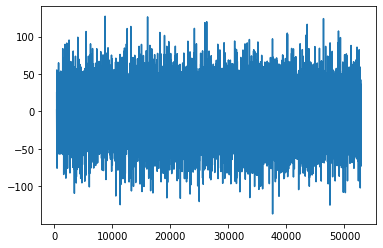

In [68]:
df['res_diff'].plot()

In [69]:
df['res_diff'].mean()

-0.0004044330115123135

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 3.000e+00, 1.000e+00, 5.000e+00, 4.000e+00,
        3.000e+00, 5.000e+00, 6.000e+00, 1.200e+01, 1.400e+01, 1.500e+01,
        1.600e+01, 1.500e+01, 2.100e+01, 3.200e+01, 4.100e+01, 4.000e+01,
        4.000e+01, 4.800e+01, 6.000e+01, 8.200e+01, 8.300e+01, 1.120e+02,
        1.590e+02, 1.790e+02, 2.040e+02, 2.290e+02, 3.040e+02, 3.520e+02,
        4.260e+02, 5.140e+02, 5.870e+02, 7.180e+02, 8.160e+02, 9.500e+02,
        1.113e+03, 1.287e+03, 1.442e+03, 1.684e+03, 1.779e+03, 2.059e+03,
        2.169e+03, 2.294e+03, 2.533e+03, 2.477e+03, 2.564e+03, 2.441e+03,
        2.375e+03, 2.242e+03, 2.184e+03, 1.902e+03, 1.744e+03, 1.596e+03,
        1.325e+03, 1.169e+03, 9.640e+02, 8.180e+02, 6.910e+02, 5.730e+02,
        4.680e+02, 3.750e+02, 3.610e+02, 2.620e+02, 2.150e+02, 1.680e+02,
        1.340e+02, 8.400e+01, 8.500e+01, 6.400e+01, 6.500e+01, 3.700e+01,
        2.500e+01, 2.100e+01, 1.900e+0

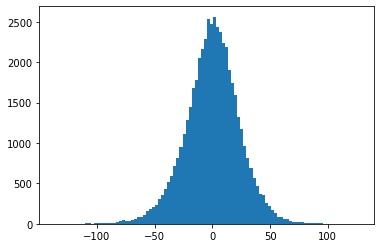

In [74]:
plt.hist(df['res_diff'].iloc[-50000:], bins = 100) #but the residual is normally distributed